<a href="https://colab.research.google.com/github/ahmedebrahim12/Data-secince-projects-main/blob/main/Traditional%20Machine%20Learning%20Projects/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚠️ Important

                                         HI👋,I am Ahmed Ebrahim (Data Scientist || ML Engineer)

---


This notebook was written entirely by me as a personal learning exercise. You can explore my other projects through my profile, where I continuously experiment with different approaches to improve my understanding of machine learning and data handling.

I truly enjoy learning by exploring the work of others, and that's why I also reviewed multiple notebooks — including another version I created for this same dataset using a different data processing strategy [Black Friday(After search & Learning)|Best RMSE](https://www.kaggle.com/code/ahmedebrahim2000/black-friday-after-search-learning-best-rmse)

I would also like to acknowledge the excellent work of my colleague **[Preeti Madan]**, whose notebook ([Preeti Madan link](https://www.kaggle.com/code/sonika82/bf-sales-prediction-75-accuracy-with-xgboost/notebook#Exploratory-Data-Analysis-(EDA))) inspired my earlier version. Her approach to data preprocessing is thoughtful and unique. Although our final performances are quite similar**(~73%) for R2 and I have slightly better RMSE (this is the main factor the task needs) and this is the best performance over all others** , I believe her method stands out and is well worth sharing.

So now, enjoy this journey through the data! 🚀


# Introduction to data and task

> **About Dataset**
>- A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.


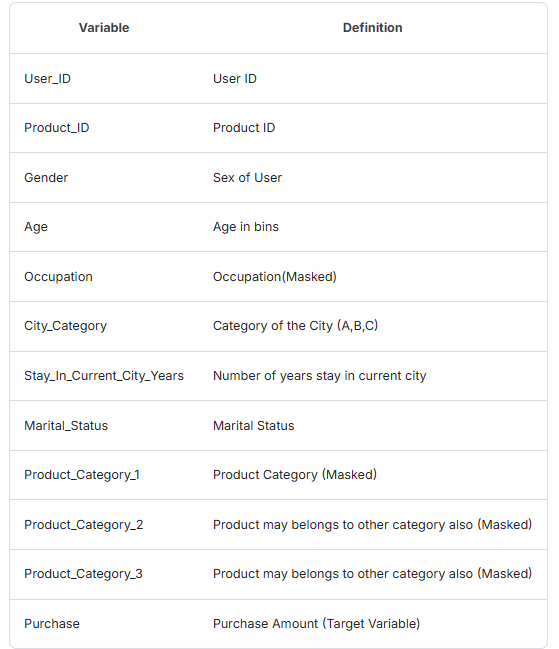

Your model performance will be evaluated on the basis of your prediction of the purchase amount for the test data (test.csv), which contains similar data-points as train except for their purchase amount. Your submission needs to be in the format as shown in "SampleSubmission.csv".

We at our end, have the actual purchase amount for the test dataset, against which your predictions will be evaluated. Submissions are scored on the root mean squared error (RMSE). RMSE is very common and is a suitable general-purpose error metric. Compared to the Mean Absolute Error, RMSE punishes large errors:

Where y hat is the predicted value and y is the original value.

# importing and describe the data🔍

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


that mean the Product_Category_2 and Product_Category_3 have a null values and this is make sence , also we have features need to be encode and from my head of data we also need to apply featur engineering to be ready to use

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,550068.0,1.003029e+06,1727.591586,1000001.0,1001516.0,1003077.0,1004478.0,1006040.0
Occupation,550068.0,8.076707e+00,6.522660,0.0,2.0,7.0,14.0,20.0
Marital_Status,550068.0,4.096530e-01,0.491770,0.0,0.0,0.0,1.0,1.0
Product_Category_1,550068.0,5.404270e+00,3.936211,1.0,1.0,5.0,8.0,20.0
Product_Category_2,376430.0,9.842329e+00,5.086590,2.0,5.0,9.0,15.0,18.0
Product_Category_3,166821.0,1.266824e+01,4.125338,3.0,9.0,14.0,16.0,18.0
Purchase,550068.0,9.263969e+03,5023.065394,12.0,5823.0,8047.0,12054.0,23961.0


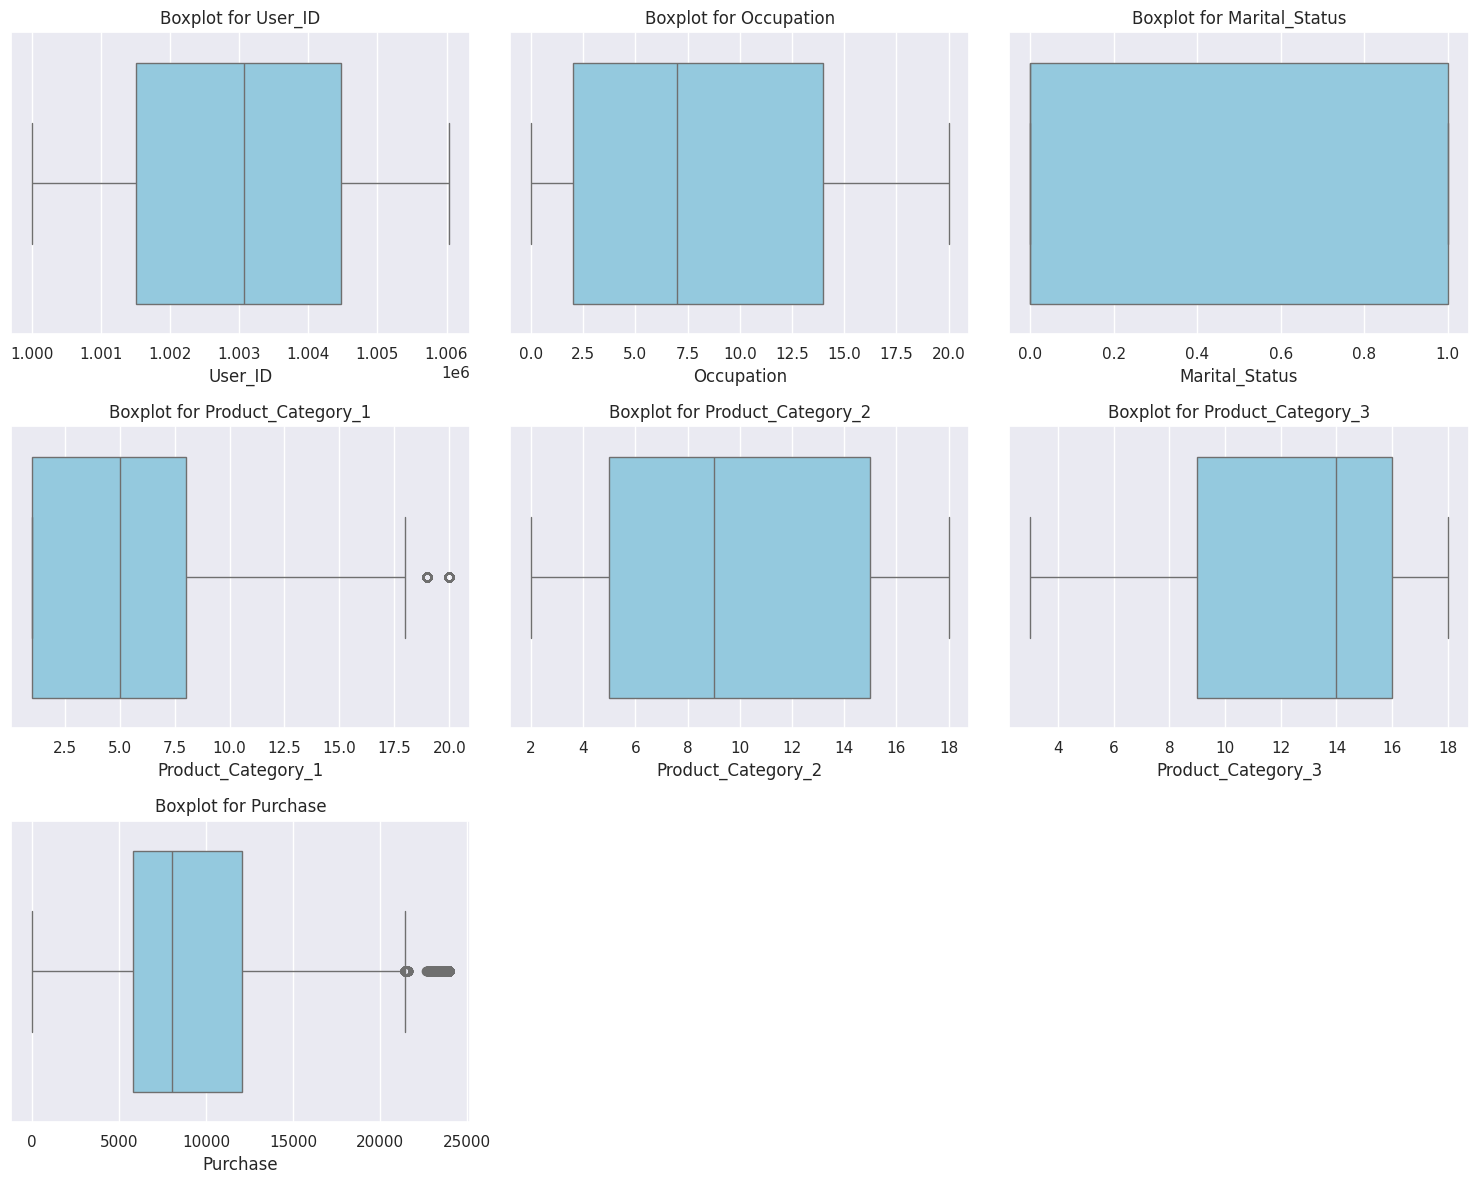

In [ ]:
import math

cols = df.select_dtypes(include=['number']).columns
n = len(cols)

cols_per_row = 3
rows = math.ceil(n / cols_per_row)


fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot for {col}')
    axes[i].set_xlabel(col)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

***Outlier Inspection and Decision***

We identified noticeable outliers in the `Purchase` feature and some product category features. However, after extensive research and domain consideration, it became clear that these values are part of the natural distribution of the data and likely represent genuine customer behavior (e.g., high purchase amounts for premium products).

Therefore, instead of treating or removing these outliers, we decided to **retain them** and focus on using machine learning models that are **robust to outliers**, such as tree-based models (e.g., Random Forest, XGBoost), to ensure we capture the true patterns without distorting the data.


In [ ]:
(df['Product_ID'].value_counts()>1).sum()

np.int64(3487)

In [ ]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [ ]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

# cleaning🧹

In [ ]:
df['Product_Category_2'].fillna(0,inplace=True)
df['Product_Category_3'].fillna(0,inplace=True)
df.isnull().sum()

/tmp/ipython-input-30-2804804425.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product_Category_2'].fillna(0,inplace=True)
/tmp/ipython-input-30-2804804425.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


Now, the meaning of Nan in product_category(2,3) means it is zero or it doesn't have another detection of a category than the first(product_category_1)

# EDA 📈

Now it is time to conduct various analyses of the data, and most of the following is focused on purchases, as this is our primary goal.

## user_ID

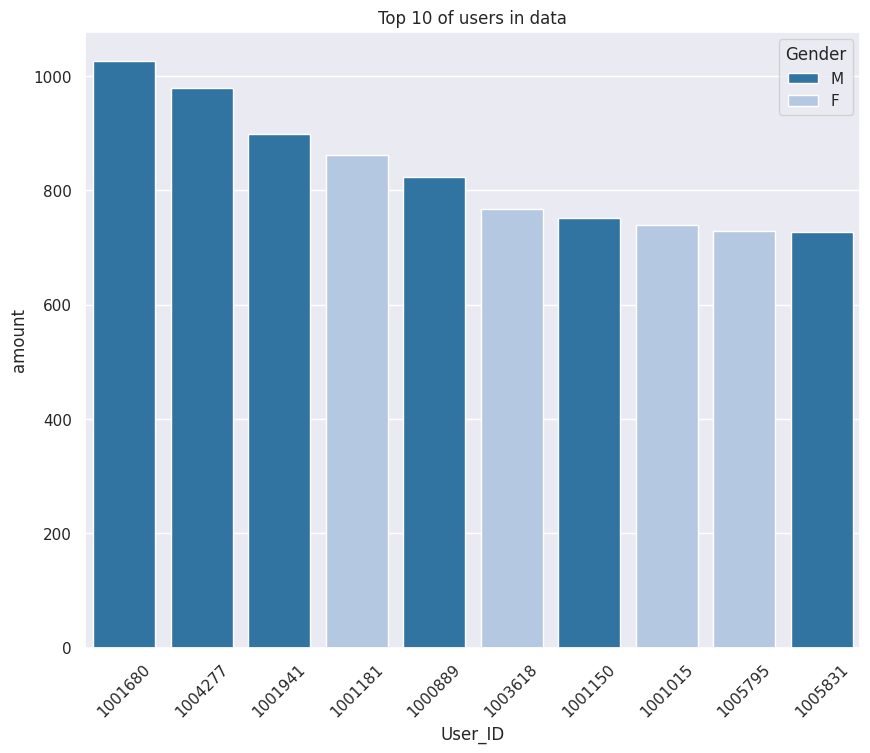

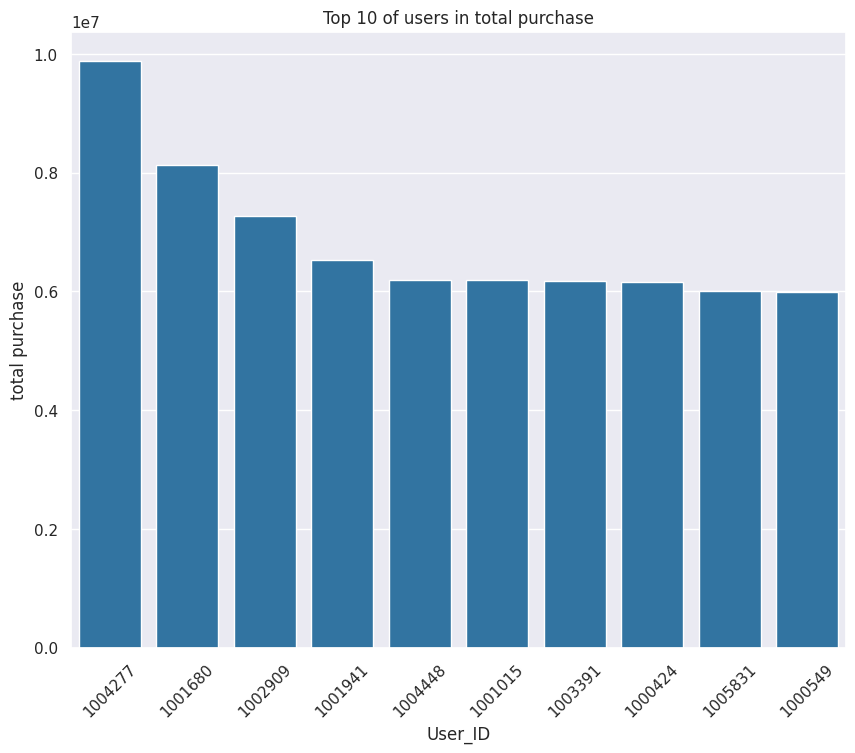

In [ ]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid",palette="tab20")
sns.barplot(x=df['User_ID'].value_counts()[0:10].index,
            y=df['User_ID'].value_counts()[0:10].values,
            order=df['User_ID'].value_counts()[0:10].index,
            hue=df['Gender'][df['User_ID'].value_counts()[0:10]],
            )
plt.xticks(rotation=45)
plt.title('Top 10 of users in data')
plt.ylabel('amount')

plt.show()
plt.figure(figsize=(10,8))
users_per_purchase = df.groupby('User_ID')['Purchase'].unique().apply(lambda x: sum(x))
users_per_purchase = users_per_purchase.sort_values(ascending=False)
users_per_purchase=users_per_purchase.head(10)
sns.barplot(x=users_per_purchase.index,
            y=users_per_purchase.values,
            order=users_per_purchase.index,
            )
plt.xticks(rotation=45)
plt.title('Top 10 of users in total purchase')
plt.ylabel('total purchase')
plt.show()

**As we see that is the top 10 users in our data and also the most users who have Purchase**

## Products

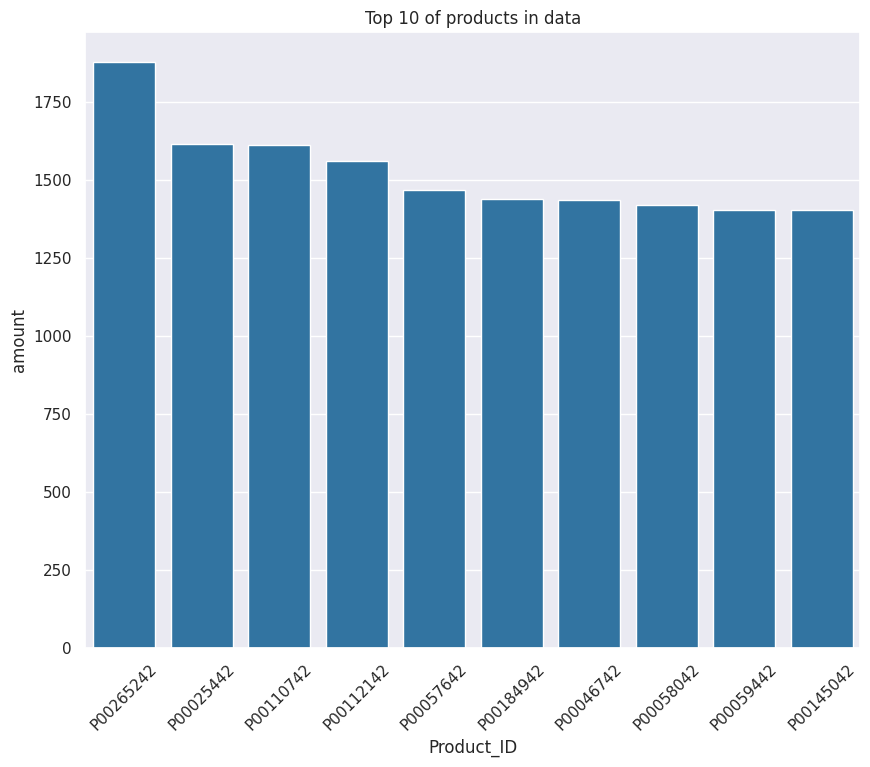

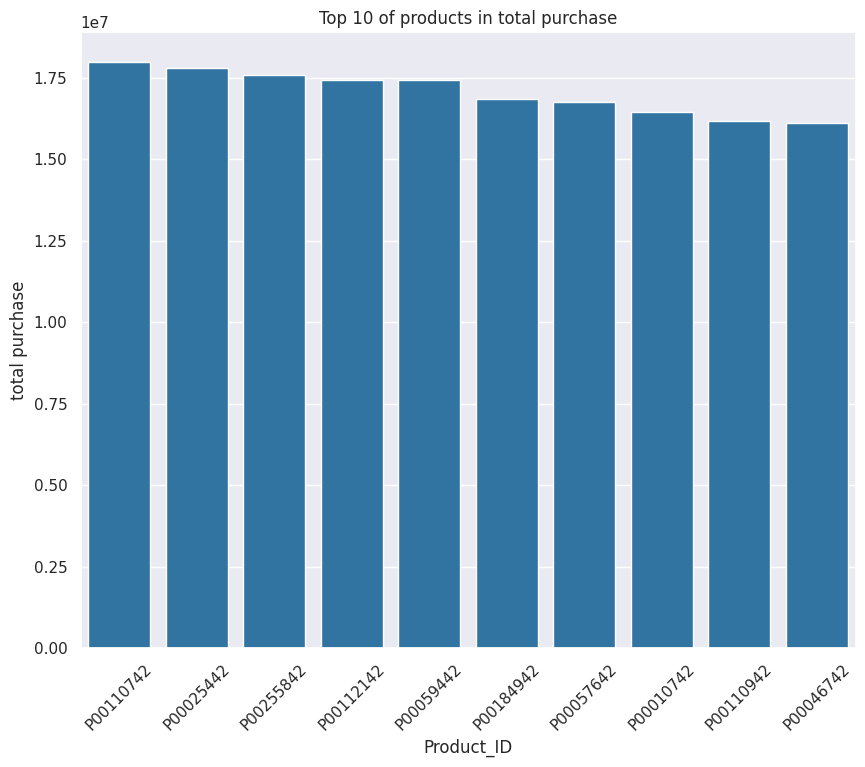

In [ ]:
plt.figure(figsize=(10,8))
sns.set(style="darkgrid",palette="tab20")
sns.barplot(x=df['Product_ID'].value_counts()[0:10].index,
            y=df['Product_ID'].value_counts()[0:10].values,
            order=df['Product_ID'].value_counts()[0:10].index,
            )
plt.xticks(rotation=45)
plt.title('Top 10 of products in data')
plt.ylabel('amount')
plt.show()
plt.figure(figsize=(10,8))
users_per_purchase = df.groupby('Product_ID')['Purchase'].unique().apply(lambda x: sum(x))
users_per_purchase = users_per_purchase.sort_values(ascending=False)
users_per_purchase=users_per_purchase.head(10)
sns.barplot(x=users_per_purchase.index,
            y=users_per_purchase.values,
            order=users_per_purchase.index,
            )
plt.xticks(rotation=45)
plt.title('Top 10 of products in total purchase')
plt.ylabel('total purchase')
plt.show()

**As we see that is the top 10 products in our data and also the most products who have Purchase**

## Gender

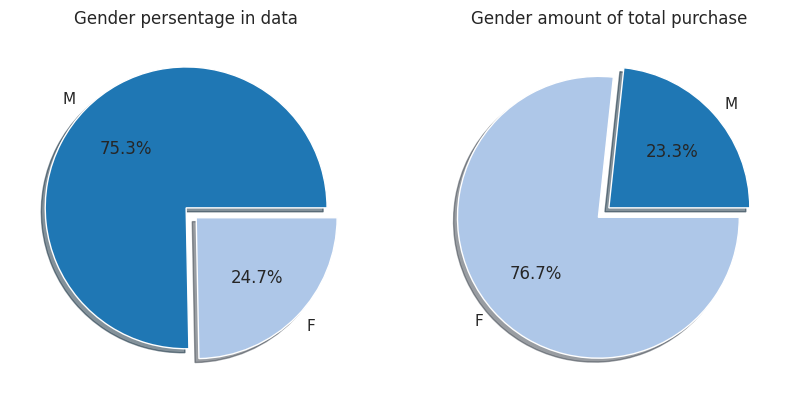

In [ ]:
explode = (0, 0.1)
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.set(style="darkgrid",palette="tab20")
ax[0].pie(df['Gender'].value_counts(),
        labels=df['Gender'].value_counts().index,
        autopct='%1.1f%%',
        shadow=0.2,
        explode=explode,
        )
ax[0].set_title('Gender persentage in data')

ax[1].pie(df.groupby('Gender')['Purchase'].sum(),
        labels=df['Gender'].value_counts().index,
        autopct='%1.1f%%',
        shadow=0.2,
       explode=explode,
        )
ax[1].set_title('Gender amount of total purchase')
plt.show()

**As we see the males have the big part of the data How ever the females have the big total purchase**

## Age

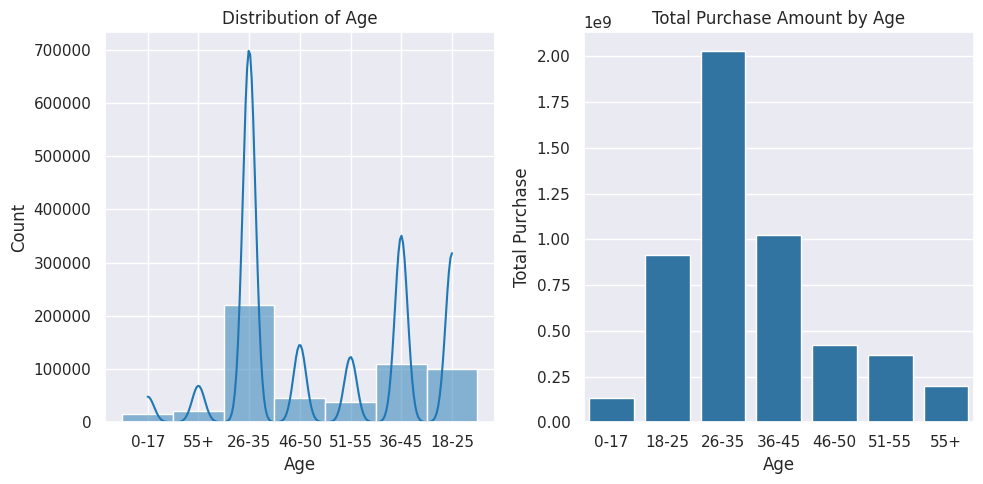

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.set(style="darkgrid",palette="tab20")
sns.histplot(df['Age'], ax=ax[0], kde=True)
ax[0].set_title('Distribution of Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')

age_purchase = df.groupby('Age')['Purchase'].sum().reset_index()
sns.barplot(x=age_purchase['Age'], y=age_purchase['Purchase'], ax=ax[1])
ax[1].set_title('Total Purchase Amount by Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Total Purchase')

plt.tight_layout()
plt.show()

**As we see most categories of users have ages between 26 and 35 and most categories in the amount of total purchase**

## Occupation

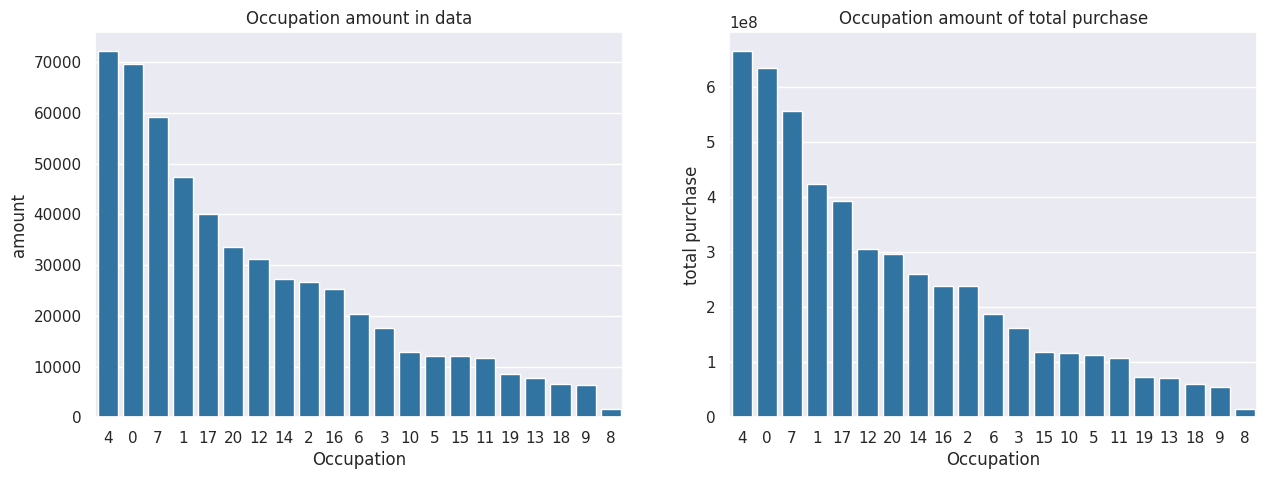

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.set(style="darkgrid",palette="tab20")
sns.barplot(x=df['Occupation'].value_counts().index
            ,y=df['Occupation'].value_counts().values,order=df['Occupation'].value_counts().index,ax=ax[0])
ax[0].set_title('Occupation amount in data')
ax[0].set_ylabel('amount')
sns.barplot(df.groupby('Occupation')['Purchase'].sum().sort_values(ascending=False),
            order=df.groupby('Occupation')['Purchase'].sum().sort_values(ascending=False).index,ax=ax[1])
ax[1].set_title('Occupation amount of total purchase')
ax[1].set_ylabel('total purchase')
# plt.xticks(rotation=45)
plt.show()

**As we see that is the order of Occupation in our data and also the most Ocupation who have Purchase**

## City

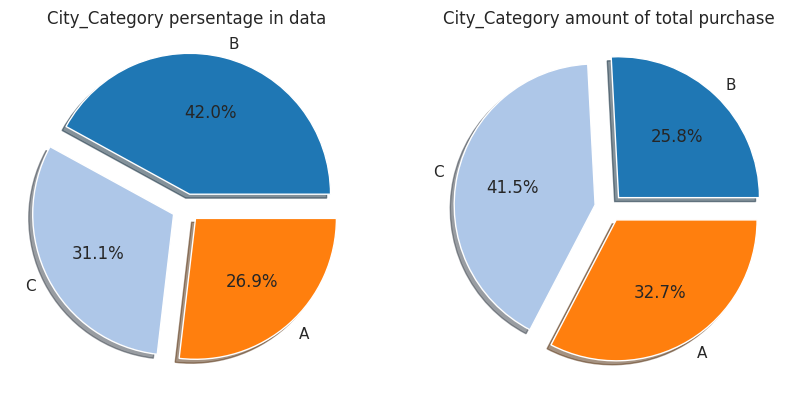

In [ ]:
explode = (0.1, 0.1,0.1)
sns.set(style="darkgrid",palette="tab20")
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].pie(df['City_Category'].value_counts(),
        labels=df['City_Category'].value_counts().index,
        autopct='%1.1f%%',
        shadow=0.2,
       explode=explode,
        )
ax[0].set_title('City_Category persentage in data')

ax[1].pie(df.groupby('City_Category')['Purchase'].sum(),
        labels=df['City_Category'].value_counts().index,
        autopct='%1.1f%%',
        shadow=0.2,
       explode=explode,

        )
ax[1].set_title('City_Category amount of total purchase')
plt.show()

**As we see the B-categry have the big part of the data How ever the C-categry have the big total purchase**

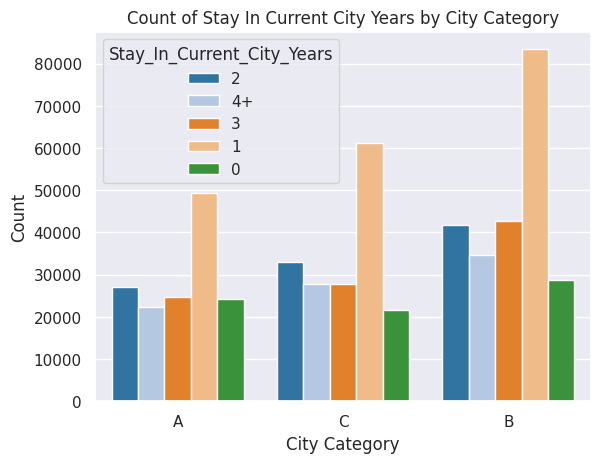

In [ ]:
sns.set(style="darkgrid",palette="tab20")
sns.countplot(data=df, x='City_Category', hue='Stay_In_Current_City_Years')
plt.title('Count of Stay In Current City Years by City Category')
plt.xlabel('City Category')
plt.ylabel('Count')
plt.show()

## Stay in city

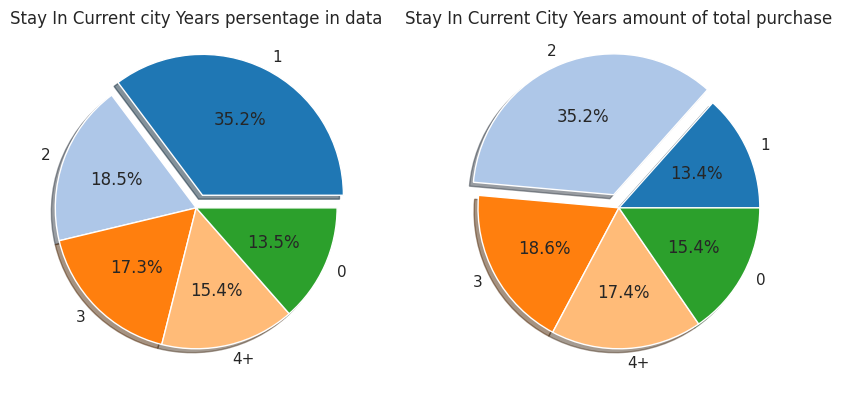

In [ ]:
explode = (0.1, 0,0,0,0)
sns.set(style="darkgrid",palette="tab20")
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].pie(df['Stay_In_Current_City_Years'].value_counts(),
        labels=df['Stay_In_Current_City_Years'].value_counts().index,
        autopct='%1.1f%%',
        shadow=0.2,
        explode=explode
        )
ax[0].set_title('Stay In Current city Years persentage in data')

explode = (0, 0.1,0,0,0)
ax[1].pie(df.groupby('Stay_In_Current_City_Years')['Purchase'].sum(),
        labels=df['Stay_In_Current_City_Years'].value_counts().index,
        autopct='%1.1f%%',
        shadow=0.2,
       explode=explode
        )
ax[1].set_title('Stay In Current City Years amount of total purchase')
plt.show()


**As we see the person have stay one year have the big part of the data How ever the person have stay two years have the big total purchase**

## Marital status

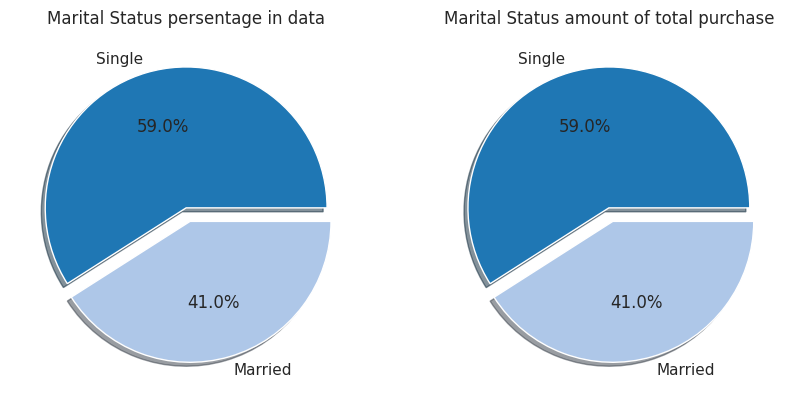

In [ ]:
Marital_Status_map = {0:'Single', 1:'Married'}
explode=(0,0.1)
sns.set(style="darkgrid",palette="tab20")
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].pie(df['Marital_Status'].value_counts(),
        labels=df['Marital_Status'].value_counts().index.map(Marital_Status_map),
        autopct='%1.1f%%',
        shadow=0.2,
        explode=explode,
        )
ax[0].set_title('Marital Status persentage in data')


ax[1].pie(df.groupby('Marital_Status')['Purchase'].sum(),
        labels=df['Marital_Status'].value_counts().index.map(Marital_Status_map),
        autopct='%1.1f%%',
        shadow=0.2,
       explode=explode
        )
ax[1].set_title('Marital Status amount of total purchase')
plt.show()

**As we see the Singles have the big part of the data and the same have the big total purchase**

## products category

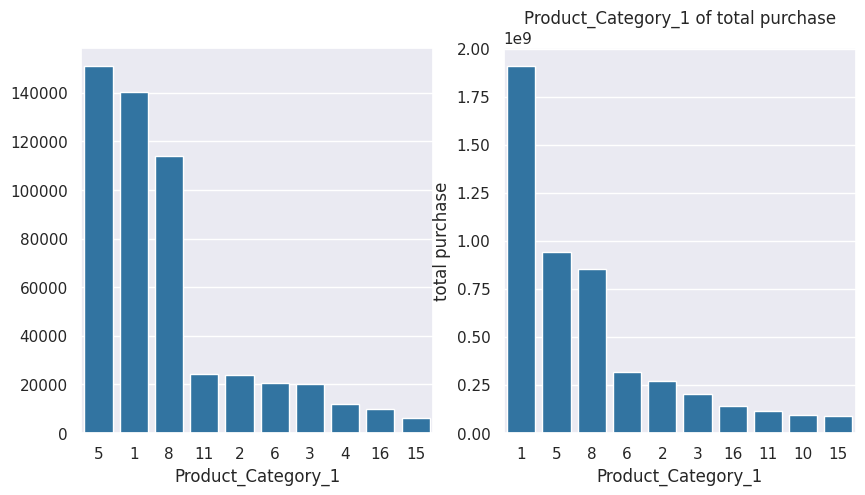

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.set(style="darkgrid",palette="tab20")
sns.barplot(x=df['Product_Category_1'].value_counts().sort_values(ascending=False)[0:10].index,
            y=df['Product_Category_1'].value_counts().sort_values(ascending=False)[0:10].values,
            order=df['Product_Category_1'].value_counts().sort_values(ascending=False)[0:10].index,ax=ax[0])
plt.title('Product_Category_1 amount in data')
plt.ylabel('amount')

sns.barplot(df.groupby('Product_Category_1')['Purchase'].sum().sort_values(ascending=False)[0:10],
            order=df.groupby('Product_Category_1')['Purchase'].sum().sort_values(ascending=False)[0:10].index,ax=ax[1])
plt.title('Product_Category_1 of total purchase')
plt.ylabel('total purchase')
plt.show()

**As we see that is the order of product category 1 in our data and also the most  product category 1 who have Purchase and how ever the category 5 have the most amount in data but, category 1 have the most total purchase**

## Finally

All the previous visualizations and statistical summaries represent only a portion of the full set of analyses that can be performed during an in-depth data analysis process. While these steps help us understand the basic structure and characteristics of the dataset, our **main objective here is to prepare the data for building and training a machine learning model**.

It is important to note that many additional and valuable analyses are missing, which would typically be essential in a pure data analysis task. However, since our current focus is on **data preparation for modeling**, we are prioritizing tasks that directly serve that goal.


# feature engineering ⚙️

In [ ]:
df.drop('User_ID',axis=1,inplace=True)

**this is ID and it not important for any model**

In [ ]:
product_group =df.groupby('Product_ID')['Purchase'].mean()

In [ ]:
df['product_id_mean'] = df['Product_ID'].map(product_group)

In [ ]:
df.drop('Product_ID',axis=1,inplace=True)

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_id_mean
0,F,0-17,10,A,2,0,3,0.0,0.0,8370,11870.863436
1,F,0-17,10,A,2,0,1,6.0,14.0,15200,16304.030981
2,F,0-17,10,A,2,0,12,0.0,0.0,1422,1237.892157
3,F,0-17,10,A,2,0,12,14.0,0.0,1057,1455.140762
4,M,55+,16,C,4+,0,8,0.0,0.0,7969,7692.763547


**Handling the `Product_ID` Feature**

When preparing the final dataset for training, I carefully considered how to represent the `Product_ID` feature. After a significant amount of research and reflection (this is the only thing I search about it in this notebook ), I realized that although `Product_ID` may look like a pure identifier, it actually carries **strong information about the purchase behavior**.

Instead of discarding it or treating it as a high-cardinality categorical feature, I chose to encode it using the **mean purchase amount per product**. This converts the ID into a **statistical feature** that reflects the average customer spending on each product, thus capturing its real-world impact more effectively.

While this transformation naturally introduces a strong correlation between `Product_ID` and `Purchase`, it is not considered data leakage in this case, since the aggregation was performed **only on the training set**.  
> ⚠️ **Important Note:** When applying this encoding to the test set, care must be taken to avoid data leakage by:
> - Calculating means **only from the training set**
> - Filling unknown (unseen) `Product_ID`s in the test set with a global mean or a fallback value

Overall, this technique helps convert `Product_ID` into a meaningful numerical representation that models can interpret and benefit from.


# Encoding 🔢

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df['City_Category']=LabelEncoder().fit_transform(df['City_Category'])
df['Age']=LabelEncoder().fit_transform(df['Age'])
df['Stay_In_Current_City_Years']=LabelEncoder().fit_transform(df['Stay_In_Current_City_Years'])

In [ ]:
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,product_id_mean
0,0,0,10,0,2,0,3,0.0,0.0,8370,11870.863436
1,0,0,10,0,2,0,1,6.0,14.0,15200,16304.030981
2,0,0,10,0,2,0,12,0.0,0.0,1422,1237.892157
3,0,0,10,0,2,0,12,14.0,0.0,1057,1455.140762
4,1,6,16,2,4,0,8,0.0,0.0,7969,7692.763547


**✅ Finish encoding in a basic way by label encoder**

<Axes: >

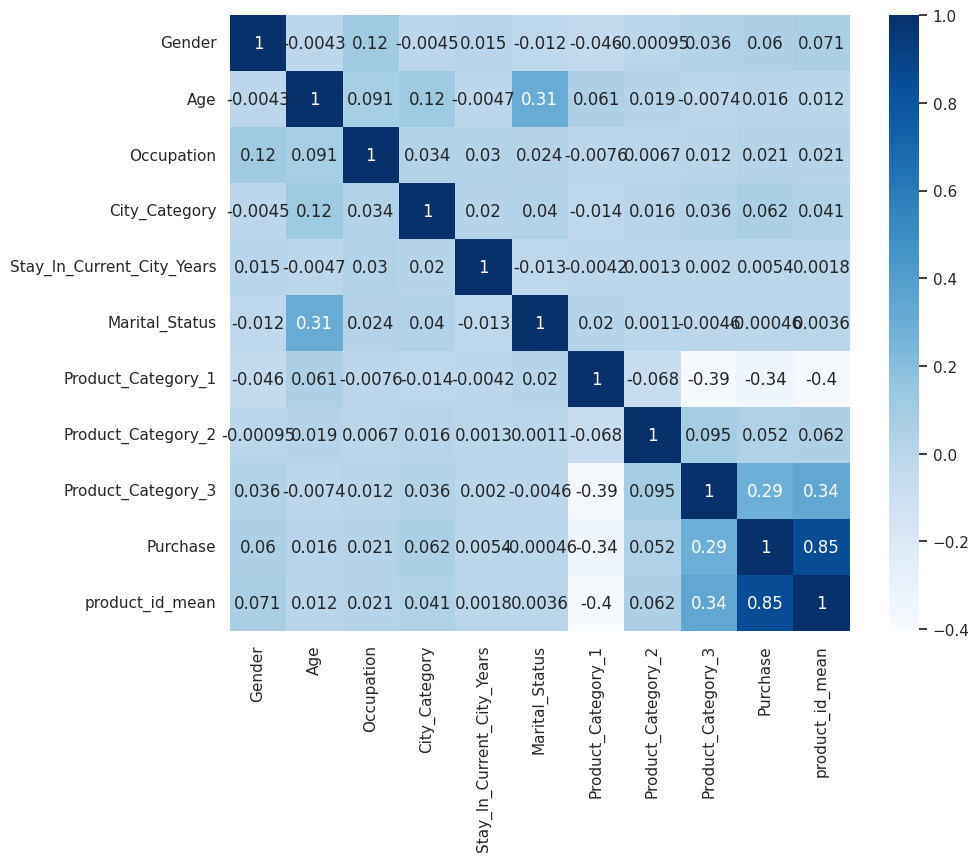

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

# spliting and train models don't needed a scaling 🧠

## spliting

In [ ]:
x_basic=df.drop('Purchase',axis=1)
y_basic=df['Purchase']

In [ ]:
from sklearn.model_selection import train_test_split
x_train_b,x_test_b,y_train_b,y_test_b=train_test_split(x_basic,y_basic,test_size=0.2,random_state=42)

In [ ]:
x_train_sample, _, y_train_sample, _ = train_test_split(x_train_b, y_train_b, test_size=0.85, random_state=42)

**Again this is for grid search only for speed and time**

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

dt = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['squared_error', 'absolute_error']
}

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train_sample, y_train_sample)

print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'criterion': 'squared_error', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score (Negative MSE): -6965786.3519943


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
dt = DecisionTreeRegressor(max_depth=5,criterion='squared_error',min_samples_leaf=1,min_samples_split=2,random_state=42)
dt.fit(x_train_b,y_train_b)
y_predict=dt.predict(x_test_b)
print('MSE:',mean_squared_error(y_test_b,y_predict))
print('MAE:',mean_absolute_error(y_test_b,y_predict))

MSE: 7134280.26120024
MAE: 1974.2730500022335


In [ ]:
from sklearn import metrics
print('R2 score:',r2_score(y_test_b,y_predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test_b, y_predict)))

R2 score: 0.7160618813986463
RMSE: 2671.007349521944


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(n_estimators=200,random_state=42)


param_dist = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2']
}


grid =RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    cv=3,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

grid.fit(x_train_sample, y_train_sample)

print("Best Parameters:", grid.best_params_)
print("Best Score (Negative MSE):", grid.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 15}
Best Score (Negative MSE): -6905023.982312913


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=5,max_features='sqrt',max_depth=15,random_state=42)
rf.fit(x_train_b,y_train_b)
y_predict=rf.predict(x_test_b)
print('MSE:',mean_squared_error(y_test_b,y_predict))
print('MAE:',mean_absolute_error(y_test_b,y_predict))

MSE: 6905324.350020635
MAE: 1939.7335423001546


In [ ]:
print('R2 score:',r2_score(y_test_b,y_predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test_b, y_predict)))

R2 score: 0.7251741265422171
RMSE: 2627.798384583687


# scaling 📏

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_s=scaler.fit_transform(x_train_b)
x_test_s=scaler.transform(x_test_b)

# train more models 🧠

## LinearRegression

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train_s,y_train_b)
y_predict=lr.predict(x_test_s)
print('MSE:',mean_squared_error(y_test_b,y_predict))
print('MAE:',mean_absolute_error(y_test_b,y_predict))

MSE: 7068144.168902342
MAE: 1962.6485544122515


## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_s,y_train_b)
y_predict=knn.predict(x_test_s)
print('MSE:',mean_squared_error(y_test_b,y_predict))
print('MAE:',mean_absolute_error(y_test_b,y_predict))

MSE: 7854162.215890704
MAE: 2050.7176559346995


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print('R2 score:',r2_score(y_test_b,y_predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test_b, y_predict)))

R2 score: 0.6874112088225331
RMSE: 2802.527826068941


## xgboost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
xgb=XGBRegressor(n_estimators=1000,learning_rate=0.05,random_state=42)
xgb.fit(x_train_s,y_train_b)
y_predict=xgb.predict(x_test_s)
print('MSE:',mean_squared_error(y_test_b,y_predict))
print('MAE:',mean_absolute_error(y_test_b,y_predict))

MSE: 6701351.0
MAE: 1907.134765625


In [ ]:
print('R2 score:',r2_score(y_test_b,y_predict))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test_b, y_predict)))

R2 score: 0.7332921028137207
RMSE: 2588.6967763722346


## stacking

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.ensemble import StackingRegressor
base_models = [
    ('rf', RandomForestRegressor(n_estimators=200,min_samples_split=2,min_samples_leaf=5,max_features='sqrt',max_depth=15,random_state=42)),
    ('xgb', XGBRegressor(n_estimators=1000,learning_rate=0.05,random_state=42))
]

meta_model = LinearRegression()

stacking_clf = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    verbose=1
)


stacking_clf.fit(x_train_s, y_train_b)
y_pred = stacking_clf.predict(x_test_s)
print('MSE:',mean_squared_error(y_test_b,y_pred))
print('MAE:',mean_absolute_error(y_test_b,y_pred))

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.8min finished
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min finished


MSE: 6700366.408739197
MAE: 1906.7705900636297


In [ ]:
print('R2 score:',r2_score(y_test_b,y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test_b, y_predict)))

R2 score: 0.7333312734595249
RMSE: 2588.6967763722346


# predict 🔭

## import data

In [ ]:
df_test=pd.read_csv('test.csv')
df=pd.read_csv('train.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [ ]:
df_final=pd.DataFrame()
df_final['User_ID']=df_test['User_ID']
df_final['Product_ID']=df_test['Product_ID']
df_final.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


## predict for test data

In [ ]:
df_test['Product_Category_2'].fillna(0,inplace=True)
df_test['Product_Category_3'].fillna(0,inplace=True)

df_test.drop('User_ID',axis=1,inplace=True)
product_group =df.groupby('Product_ID')['Purchase'].mean()
df_test['product_id_mean'] = df_test['Product_ID'].map(product_group)
df_test.drop('Product_ID',axis=1,inplace=True)

df_test['Gender']=LabelEncoder().fit_transform(df_test['Gender'])
df_test['City_Category']=LabelEncoder().fit_transform(df_test['City_Category'])
df_test['Age']=LabelEncoder().fit_transform(df_test['Age'])
df_test['Stay_In_Current_City_Years']=LabelEncoder().fit_transform(df_test['Stay_In_Current_City_Years'])

scaler=StandardScaler()
df_test=scaler.fit_transform(df_test)

y_predict=xgb.predict(df_test)
df_final['Purchase']=y_predict
df_final.head()

,User_ID,Product_ID,Purchase
0,1000004,P00128942,4883.567871
1,1000009,P00113442,1503.235596
2,1000010,P00288442,4120.314941
3,1000010,P00145342,4120.314941
4,1000011,P00053842,3634.311279


In [ ]:
pd.DataFrame(df_final).to_csv('submission.csv',index=False)